In [0]:

import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import numpy as np            
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns

#Reading the dataset
df = spark.read.option("header",'true').csv("/FileStore/tables/city_temperature.csv",inferSchema=True)

print(df.dtypes)



[('Region', 'string'), ('Country', 'string'), ('State', 'string'), ('City', 'string'), ('Month', 'int'), ('Day', 'int'), ('Year', 'int'), ('AvgTemperature', 'double')]


In [0]:



df.createOrReplaceTempView("countrydata")



In [0]:
Sql = spark.sql("""SELECT  * FROM countrydata where Country = "US" and State  = "Arizona" and 1=1""")

print(Sql.limit(10).toPandas())
data_Arizona=Sql.toPandas()
data_Arizona

          Region Country    State       City  Month  Day  Year  AvgTemperature
0  North America      US  Arizona  Flagstaff      1    1  1995            25.0
1  North America      US  Arizona  Flagstaff      1    2  1995            27.4
2  North America      US  Arizona  Flagstaff      1    3  1995            30.9
3  North America      US  Arizona  Flagstaff      1    4  1995            31.1
4  North America      US  Arizona  Flagstaff      1    5  1995            30.8
5  North America      US  Arizona  Flagstaff      1    6  1995            27.8
6  North America      US  Arizona  Flagstaff      1    7  1995            24.7
7  North America      US  Arizona  Flagstaff      1    8  1995            33.5
8  North America      US  Arizona  Flagstaff      1    9  1995            30.2
9  North America      US  Arizona  Flagstaff      1   10  1995            35.3


,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,North America,US,Arizona,Flagstaff,1,1,1995,25.0
1,North America,US,Arizona,Flagstaff,1,2,1995,27.4
2,North America,US,Arizona,Flagstaff,1,3,1995,30.9
3,North America,US,Arizona,Flagstaff,1,4,1995,31.1
4,North America,US,Arizona,Flagstaff,1,5,1995,30.8
...,...,...,...,...,...,...,...,...
26479,North America,US,Arizona,Yuma,12,24,2006,-99.0
26480,North America,US,Arizona,Yuma,12,25,2006,-99.0
26481,North America,US,Arizona,Yuma,12,26,2006,58.3
26482,North America,US,Arizona,Yuma,12,27,2006,61.2


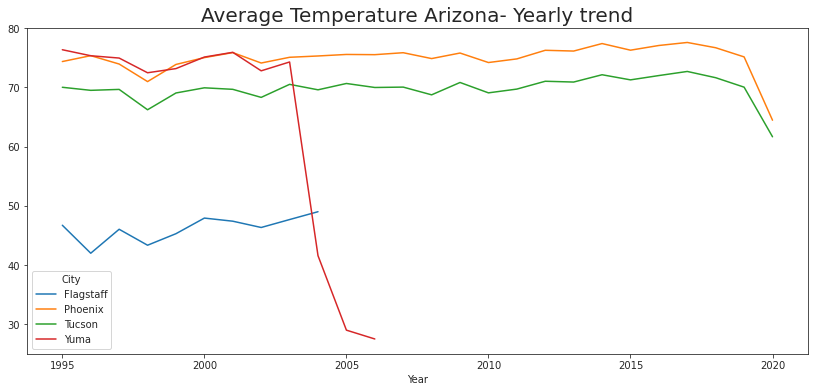

In [0]:


#plot for 4 cities and comparison of their temparatures
sns.set_style('ticks')
Arizona_plot=data_Arizona.groupby(['City','Year'])['AvgTemperature'].mean().reset_index()
Arizona_plot.pivot('Year','City','AvgTemperature').plot()

plt.title('Average Temperature Arizona- Yearly trend',fontsize=20);
plt.gcf().set_size_inches(14,6)

plt.show()



In [0]:
#Convert the data into a pandas dataframe 
df=df.toPandas()

#Choosing only the rows with US from the dataframe
data_US  = df[ (df['Country'] == 'US')]


## data preprocessing
data_US["AvgTemperature"].replace(-99, np.mean(data_US["AvgTemperature"]), inplace = True)




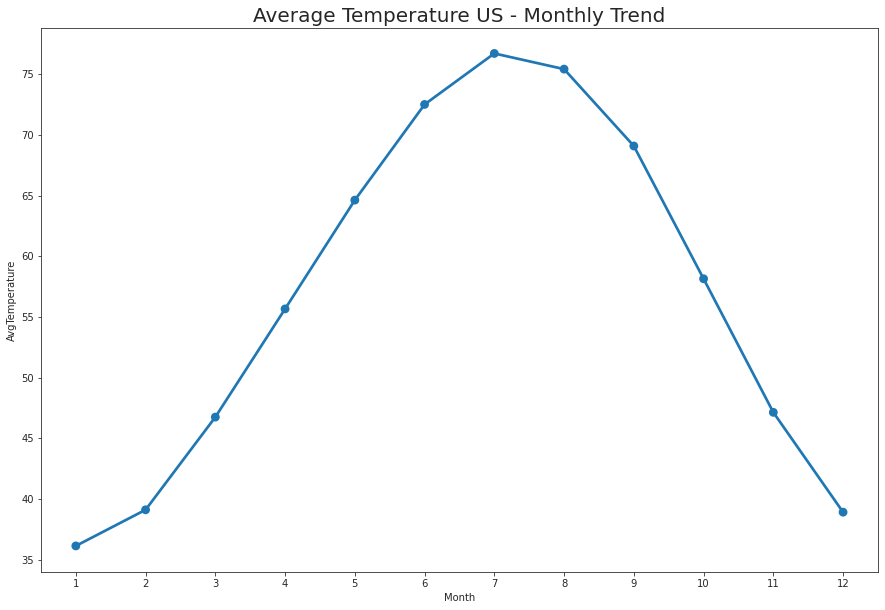

In [0]:
#Average temparature monthly in US
plt.figure(figsize= (15,10))
sns.pointplot(x='Month', y='AvgTemperature', data=data_US);
plt.title('Average Temperature US - Monthly Trend',fontsize=20);


plt.show()

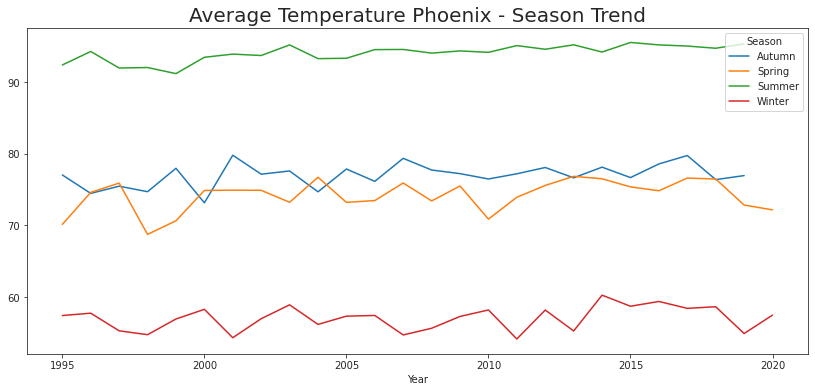

In [0]:


#creating variable 'season'
def season(df):
    if df in [12,1,2] :
        return 'Winter'
    elif  df in [3,4,5]:
        return 'Spring'
    elif df in [6,7,8]:
        return 'Summer'
    elif df in [9,10,11]:
        return 'Autumn'
    else:
        return 'NA'

pd.options.mode.chained_assignment = None  # default='warn'
data_US['Season'] = data_US['Month'].apply(season)
data_US['AvgTemperature']=data_US['AvgTemperature'].astype('float64')
data_US[['Month' , 'Day' , 'Year']]=data_US[['Month' , 'Day' , 'Year']].astype('int64')
#Seasons in phx
data_phx = data_US[data_US['City'] == 'Phoenix']
#Plot the seasons
Phoenix_plot=data_phx.groupby(['Season','Year'])['AvgTemperature'].mean().reset_index()
Phoenix_plot.pivot('Year','Season','AvgTemperature').plot()
plt.gcf().set_size_inches(14,6)
plt.title('Average Temperature Phoenix - Season Trend',fontsize=20);
plt.show()

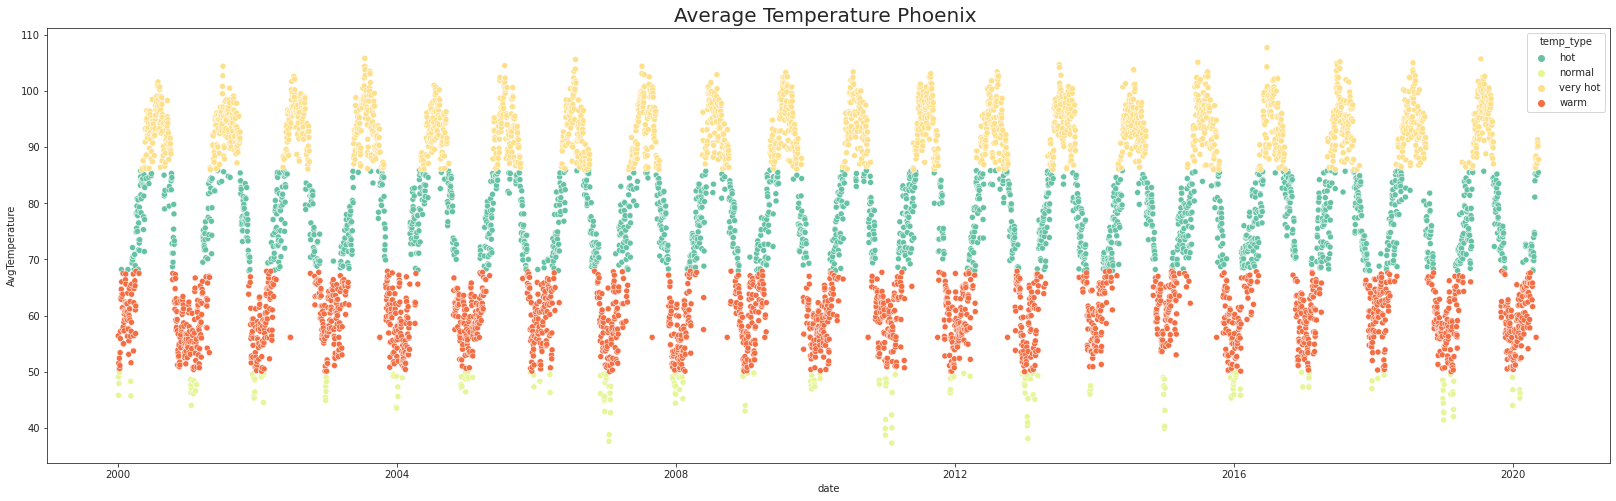

In [0]:
def temp_type(df):
        if (df is None):
            return "unknown"
        else:
            if df < 14:
                return "freezing cold"
            elif df < 23:
                return "very cold"
            elif df < 32:
                return "cold"
            elif df < 50:
                return "normal"
            elif df < 68:
                return "warm"
            elif df < 86:
                return "hot"
            elif df >= 86:
                return "very hot"
        return "normal"
    
pd.options.mode.chained_assignment = None  # default='warn'



data_US['temp_type'] = data_US['AvgTemperature'].apply(temp_type)

data_US['date'] = pd.to_datetime(dict(year=data_US.Year, month=data_US.Month, day=data_US.Day))

#temp_type in phx
data_phx = data_US[(data_US['City'] == 'Phoenix') ]
## replacing outliers to mean




data_phx_2000 = data_phx[(data_phx['Year'] >= 2000)]



#Plot the temp_type
Phoenix_plot=data_phx_2000.groupby(['temp_type','date'])['AvgTemperature'].mean().reset_index()
Phoenix_plot.pivot('date','temp_type','AvgTemperature')
sns.scatterplot(hue="temp_type", y="AvgTemperature", x="date", data=Phoenix_plot, palette="Spectral_r")

plt.gcf().set_size_inches(28,8)
plt.title('Average Temperature Phoenix ',fontsize=20)

plt.show()

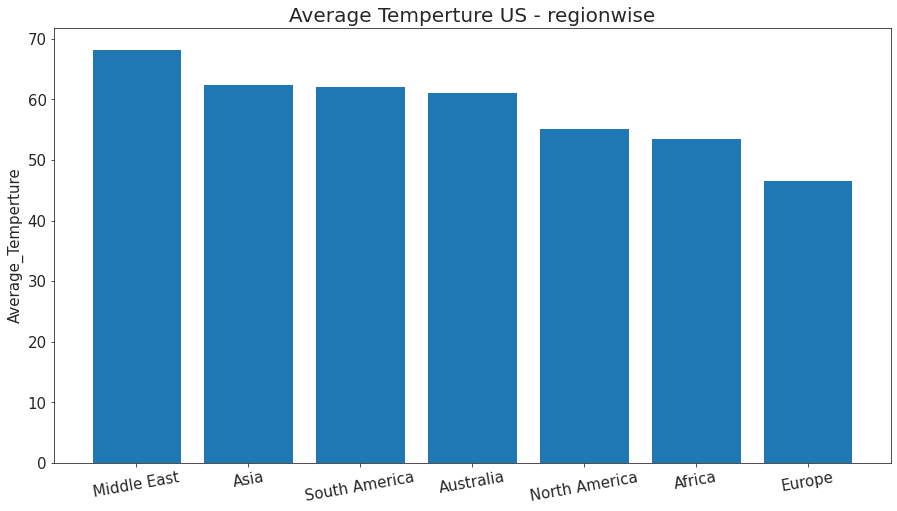

In [0]:

# regionwise distribution
Average_Temperture_in_every_region = df.groupby("Region")["AvgTemperature"].mean().sort_values()[-1::-1]
Average_Temperture_in_every_region = Average_Temperture_in_every_region.rename({"South/Central America & Carribean":"South America","Australia/South Pacific":"Australia"})
Average_Temperture_in_every_region

fig3= plt.figure(figsize = (15,8))
plt.bar(Average_Temperture_in_every_region.index,Average_Temperture_in_every_region.values)
plt.xticks(rotation = 10,size = 15)
plt.yticks(size = 15)
plt.ylabel("Average_Temperture",size = 15)
plt.title("Average Temperture US - regionwise",size = 20)

plt.show()



In [0]:
#Defining training and testing data
phx = data_US[data_US["City"] == "Phoenix"]
phx.reset_index(inplace = True)
phx.drop('index', axis = 1, inplace=True)

phx = phx.drop(['Region', 'Country', 'State','City','Month','Day','Season', 'temp_type'], axis = 1)
training_set = phx[phx["Year"] <= 2010]
test_set = phx[phx["Year"] > 2010]
test_set1 = phx[phx["Year"] > 2010]
training_set




,Year,AvgTemperature,date
0,1995,50.6,1995-01-01
1,1995,53.0,1995-01-02
2,1995,52.0,1995-01-03
3,1995,52.5,1995-01-04
4,1995,55.7,1995-01-05
...,...,...,...
5839,2010,56.8,2010-12-27
5840,2010,55.2,2010-12-28
5841,2010,52.0,2010-12-29
5842,2010,48.7,2010-12-30


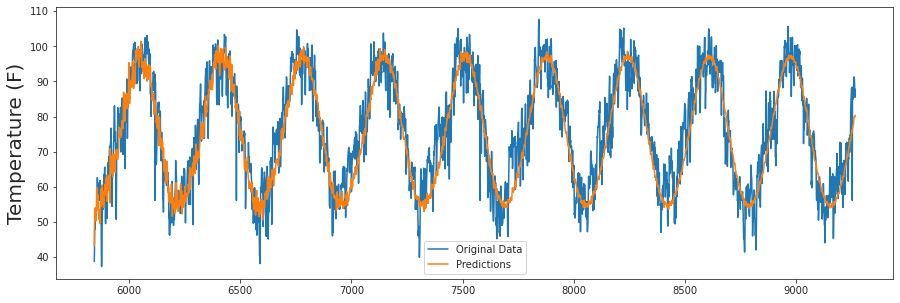

6.251606819846599


In [0]:
#AR model
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error 
model_AR = AutoReg(training_set["AvgTemperature"], lags = 1000)
model_fit_AR = model_AR.fit()
predictions_AR = model_fit_AR.predict(training_set.shape[0], training_set.shape[0] + test_set.shape[0] - 1)
import seaborn as sns
fig6= plt.figure(figsize=(15,5))
plt.ylabel("Temperature (F)", fontsize = 20)
plt.plot(test_set["AvgTemperature"], label = "Original Data")
plt.plot(predictions_AR, label = "Predictions")
plt.legend()
plt.show()


rmse = mean_squared_error(predictions_AR,test_set["AvgTemperature"])
print(rmse**0.5)


/databricks/python/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/databricks/python/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
9265    86.258623
9266    86.966689
9267    85.742517
9268    82.437967
9269    80.120455
          ...    
9761    89.853159
9762    87.887130
9763    87.135169
9764    87.033810
9765    87.240468
Length: 501, dtype: float64


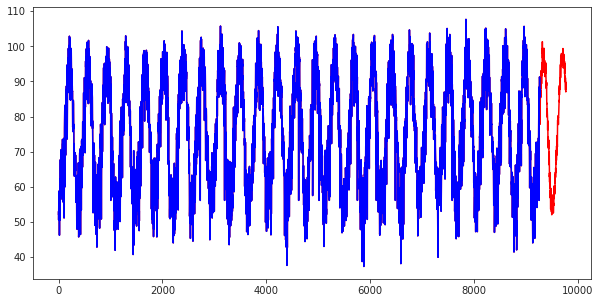

In [0]:
## predicting future values
model_AR = AutoReg(data_phx["AvgTemperature"], lags = 1000)
model_fit_AR = model_AR.fit()
y = model_fit_AR.predict(len(data_phx["AvgTemperature"]), len(data_phx["AvgTemperature"])+500)
print(y)
 
plt.figure(figsize=(10,5))
prognose = np.concatenate((data_phx["AvgTemperature"],y))
plt.plot(range(1,len(prognose)+1), prognose, 'r')
plt.plot(range(1,len(data_phx["AvgTemperature"])+1), data_phx["AvgTemperature"], 'b')
plt.show()


In [0]:
# using spark
from pyspark.sql.functions import col
from pyspark.ml.regression import LinearRegression
import pandas as pd
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import RegressionEvaluator

# convert Pandas DataFrame to Spark DataFrame
training_set_spark = spark.createDataFrame(training_set)
test_set_spark = spark.createDataFrame(test_set)

# Assemble the feature vector
assembler = VectorAssembler(inputCols=["AvgTemperature"], outputCol="features")
training_features = assembler.transform(training_set_spark).select(col("features"), col("date"), col("AvgTemperature").alias("label"))
test_features = assembler.transform(test_set_spark).select(col("features"), col("date"), col("AvgTemperature").alias("label"))

# Train the linear regression model
lr = LinearRegression(featuresCol="features", labelCol="label" ,elasticNetParam=0.5, regParam=0.01)
model = lr.fit(training_features)
##dt = DecisionTreeRegressor(featuresCol="features", labelCol="label", maxDepth=5)
##model = dt.fit(training_features)

# Make predictions on the test set
predictions = model.transform(test_features).orderBy("date")

# Convert predictions to Pandas DataFrame for plotting
predictions_pd = predictions.select("date", "prediction").toPandas()



# Compute the RMSE
evaluator = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print(rmse)


0.009881686721211733


In [0]:
predictions_pd

,date,prediction
0,2011-01-01,38.723247
1,2011-01-02,41.521465
2,2011-01-03,47.517645
3,2011-01-04,48.716881
4,2011-01-05,48.017327
...,...,...
3416,2020-05-09,90.690144
3417,2020-05-10,90.190462
3418,2020-05-11,87.692054
3419,2020-05-12,85.493454


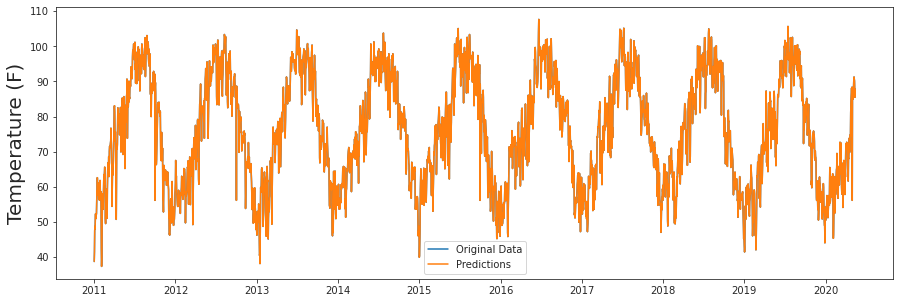

In [0]:

# Plot the data
fig6 = plt.figure(figsize=(15,5))
plt.ylabel("Temperature (F)", fontsize = 20)
plt.plot(test_set1["date"], test_set1["AvgTemperature"], label = "Original Data")
plt.plot(predictions_pd["date"], predictions_pd["prediction"], label = "Predictions")
plt.legend()
plt.show()